<a href="https://colab.research.google.com/github/NaithaniAR/Copy_of_Self_Project_Gradient_Descent.ipynb/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing  libraries

 Importing important libraries for analysis and visualisation 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.formula.api as sm
%matplotlib inline
import calendar


Libraries for machine learning 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/NYC Taxi Data.csv',parse_dates=['pickup_datetime','dropoff_datetime'])

#To suppres scientific notation.
pd.options.display.float_format = '{:.2f}'.format 

# **Data Exploration**
We will explore the data and modify dataset as per the our requirment for the further analysis of the problem.

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,N,435


In [ ]:
print("The shape of our dataset is :",(df.shape))

The shape of our dataset is : (1458644, 11)


In [ ]:
#Check count of unique id's in the dataset


print("There are %d unique id's in our dataset, which is equal to the number of records"%(df.id.nunique()))

There are 1458644 unique id's in our dataset, which is equal to the number of records


In [ ]:
#Check for NaN values


df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Calculate and assign new columns to the dataframe such as weekday,
month and pickup_hour which will help us to gain more insights from the data.

# Univariate Analysis

### **ID**
*A unique identifier for each trip*

In [ ]:
df['id'].describe()

count       1458644
unique      1458644
top       id2875421
freq              1
Name: id, dtype: object

There are no duplicate values in 'id', with  1458644 unique values 

### Vendor id

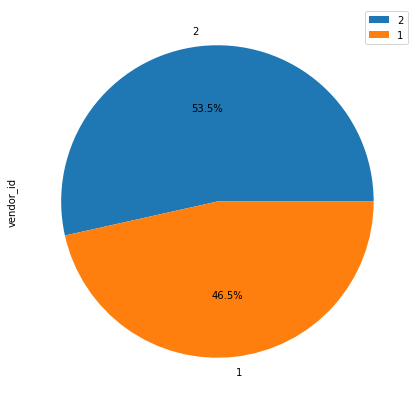

In [ ]:


df['vendor_id'].value_counts().plot.pie(figsize = (7,9), autopct='%1.1f%%')
plt.legend()


We can observe that there are approximately similar percentage on both side 

### **Pickup Datetime &  Dropoff Datetime**


*   Date and Time when the meter was disengaged and engaged
*   Extracing Date Time Month Day and Year for further analysis 



 

In [ ]:
#Date

df['pickup_date']=df['pickup_datetime'].dt.date
df['dropoff_date']=df['dropoff_datetime'].dt.date



#Day


df['pickup_weekday']=df['pickup_datetime'].dt.day_name()
df['dropoff_weekday']=df['dropoff_datetime'].dt.day_name()

#Month

df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month



# Time

df['Pick_Up_time'] = df['pickup_datetime'].dt.time
df['Drop_off_time'] = df['dropoff_datetime'].dt.time

#Year

df['pickup_Year']=df['pickup_datetime'].dt.year
df['dropoff_Year']=df['dropoff_datetime'].dt.year

#Hour
df['pickup_datetime_hour'] = df.pickup_datetime.dt.hour
df['dropoff_datetime_hour'] =df.dropoff_datetime.dt.hour


### **Passenger Count**
The number of passengers in the vehicle (driver entered value)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


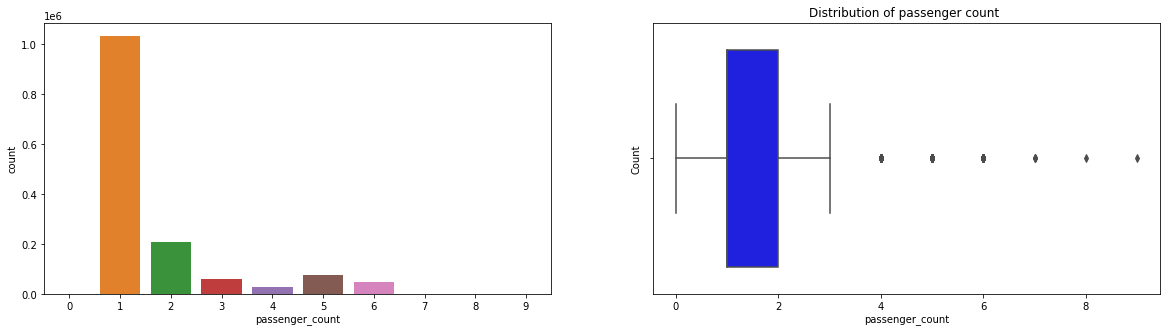

In [ ]:
#Plotting Sub Plot 

fig, axes = plt.subplots(1, 2,figsize=(20,5))

#Plotting bar graph 

sns.countplot(df['passenger_count'],ax=axes[0])
plt.title('Distribution of passenger count ')
plt.xlabel('Passenger')
plt.ylabel('Count')
#Plotting Box Plot

sns.boxplot(df['passenger_count'],color='blue',ax=axes[1])

According to [ Driver Rule 54-15(g)](https://www1.nyc.gov/assets/tlc/downloads/pdf/rule_book_current_chapter_54.pdf) of 'NYC Taxi and Limousine Commission' ,  maximum permissible number of passengers in a taxi is 6. Hence we will drop values which are greater than 6. 

There are some values that are represented by 0, we will drop these values to. because this is clearly a mistake and no further data is available for drawing any conclusions. 

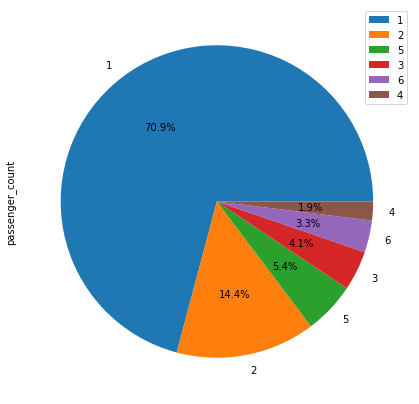

In [ ]:
df= df[(df['passenger_count']>0) & (df['passenger_count']<=6)]
df['passenger_count'].value_counts().plot.pie(figsize = (7,9), autopct='%1.1f%%')
plt.legend()

### **Geo Locations**

* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged


> We will calulate the distance, from the geolocations.
> We will calulate the Avg speed, from the distance and the trip duration. 




Distance

In [ ]:
#we will use Haversine distance to calculate the distance between two points. 

def distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return  12742 * np.arcsin(np.sqrt(a))

In [ ]:
df["distance_miles"] = distance(df["pickup_latitude"], df["pickup_longitude"], 
                                      df["dropoff_latitude"], df["dropoff_longitude"])

### Trip Duration


1 2  3 4  5 6  7 8  9 0

Text(0.5, 1.0, 'Duration Distribution')

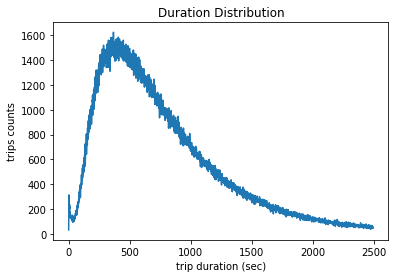

In [ ]:
# trip duration overall distribution 

# taking the 97% Quantile values to remove outliers 

tripduration = df[df.trip_duration < df.trip_duration.quantile(.97)]

#Plotting Trip duration VS Trip_duration.counts

tripduration.groupby('trip_duration').count()['id'].plot()

plt.xlabel('trip duration (sec)')
plt.ylabel('trips counts')
plt.title('Duration Distribution')

In [ ]:
df['trip_duration'].sort_values().tail()

1234291      86392
355003     1939736
680594     2049578
924150     2227612
978383     3526282
Name: trip_duration, dtype: int64


*   Most trips finished within 6-17 minute (400-1000 sec)
*  Some trips take too long/too fast are obvious wrong, maybe because of tech/maunal operation issues, should filter them in following process





### Speed

In [ ]:
#Calculate Speed 
# Distance obtained is in Kms/hr

df['Avg_Speed'] = (df.distance_miles/(df.trip_duration/3600))

### **store_and_fwd_flag**
 This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

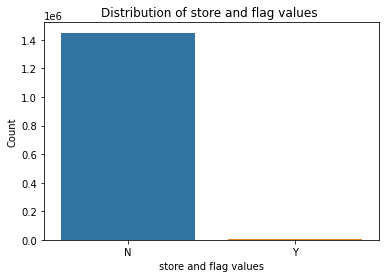

In [ ]:


#Plotting bar graph 

sns.countplot(df['store_and_fwd_flag'])
plt.title('Distribution of store and flag values ')
plt.xlabel('store and flag values')
plt.ylabel('Count')


# Bivariate analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458579 entries, 0 to 1458643
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     1458579 non-null  object        
 1   vendor_id              1458579 non-null  int64         
 2   pickup_datetime        1458579 non-null  datetime64[ns]
 3   dropoff_datetime       1458579 non-null  datetime64[ns]
 4   passenger_count        1458579 non-null  int64         
 5   pickup_longitude       1458579 non-null  float64       
 6   pickup_latitude        1458579 non-null  float64       
 7   dropoff_longitude      1458579 non-null  float64       
 8   dropoff_latitude       1458579 non-null  float64       
 9   store_and_fwd_flag     1458579 non-null  object        
 10  trip_duration          1458579 non-null  int64         
 11  pickup_date            1458579 non-null  object        
 12  dropoff_date           14585

We have added new colums, we can use these colums to analyse our data further and perform bivariate analysis 

### Pickup date & Dropoff date

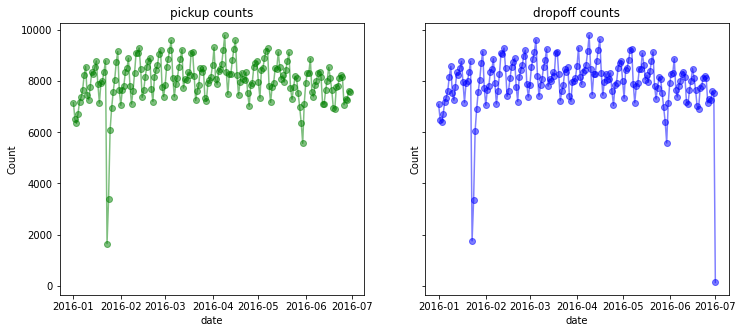

In [ ]:
fig, ax = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(12, 5)

ax[0].plot(df.groupby('pickup_date').count()['id'], 'go-', alpha=0.5)
ax[1].plot(df.groupby('dropoff_date').count()['id'], 'bo-', alpha=0.5)

ax[0].set(xlabel='date', ylabel='Count',title="pickup counts")
ax[1].set(xlabel='date', ylabel='Count',title="dropoff counts")

plt.show()

In [ ]:
df.groupby('pickup_date').count()['id'].sort_values()

pickup_date
2016-01-23    1648
2016-01-24    3383
2016-05-30    5570
2016-01-25    6083
2016-01-03    6353
              ... 
2016-02-13    9305
2016-04-02    9323
2016-03-05    9596
2016-04-16    9602
2016-04-09    9796
Name: id, Length: 182, dtype: int64

In [ ]:
df.groupby('dropoff_date').count()['id'].sort_values()

dropoff_date
2016-07-01     127
2016-01-23    1753
2016-01-24    3341
2016-05-30    5584
2016-01-25    6070
              ... 
2016-02-13    9301
2016-04-02    9311
2016-03-05    9621
2016-04-16    9640
2016-04-09    9797
Name: id, Length: 183, dtype: int64

We observe that daily Drop Off vary between 6000 and 1000, values on 26-07-01,2016-01-23,2016-01-24 are considerably low, hence we will drop these observations.

### Passenger Count 

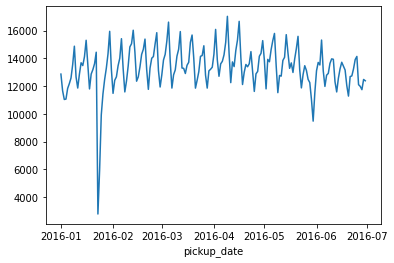

In [ ]:
df.groupby(['pickup_date']).sum()['passenger_count'].plot()


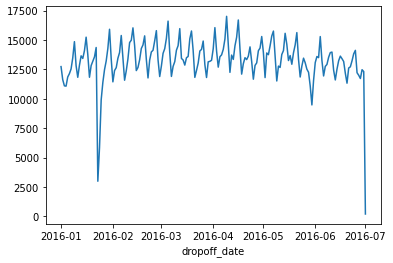

In [ ]:
df.groupby(['dropoff_date']).sum()['passenger_count'].plot()

In [ ]:
df.groupby(['dropoff_date']).sum()['passenger_count'].sort_values()

dropoff_date
2016-07-01      198
2016-01-23     2987
2016-01-24     5858
2016-05-30     9483
2016-01-25     9915
              ...  
2016-02-13    16042
2016-04-02    16061
2016-03-05    16616
2016-04-16    16712
2016-04-09    17023
Name: passenger_count, Length: 183, dtype: int64

In [ ]:
df.groupby(['pickup_date']).sum()['passenger_count'].sort_values()

pickup_date
2016-01-23     2787
2016-01-24     5927
2016-05-30     9480
2016-01-25     9928
2016-05-29    11029
              ...  
2016-02-13    16031
2016-04-02    16090
2016-03-05    16615
2016-04-16    16671
2016-04-09    17032
Name: passenger_count, Length: 182, dtype: int64



*   Passenger count is considerably less on '2016-07-01' , '2016-01-23'  




### Trip Duration VS Hour

A [pivot table](https://pbpython.com/pandas-pivot-table-explained.html) is a table of grouped values that aggregates the individual items of a more extensive table

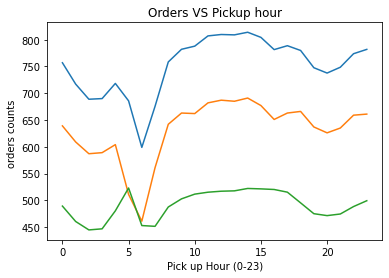

In [ ]:


#tripduration = df_train_[df_train_.trip_duration < df_train_.trip_duration.quantile(.97)]  {As Calculated in section  }


pd.pivot_table(tripduration, index='pickup_datetime_hour' ,aggfunc=np.mean)['trip_duration'].plot(label='mean')
pd.pivot_table(tripduration, index='pickup_datetime_hour' ,aggfunc=np.median)['trip_duration'].plot(label='median')
pd.pivot_table(tripduration, index='pickup_datetime_hour' ,aggfunc=np.std)['trip_duration'].plot(label='std')

#plt.legend(loc=0)
plt.xlabel('Pick up Hour (0-23)')
plt.ylabel('orders counts ')
plt.title('Orders VS Pickup hour')
plt.show()

### store_and_fwd_flag VS  Trip duration 

Text(0, 0.5, 'Trip Duration')

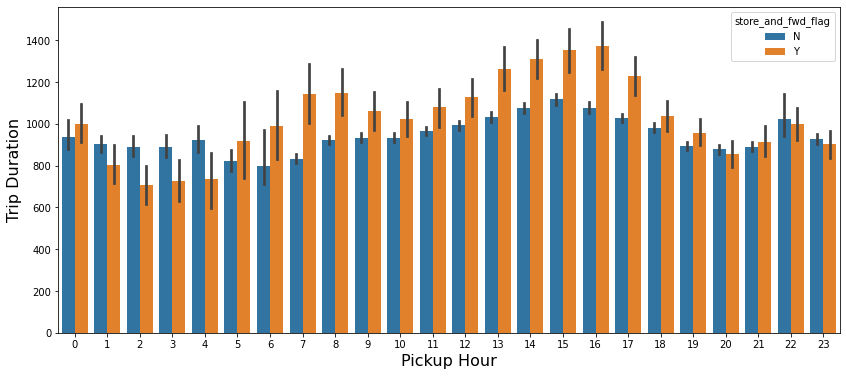

In [ ]:
# Plottong  store_and_fwd_flag VS trip_duration


plt.figure(figsize=(14,6))
sns.barplot(x='pickup_datetime_hour',y='trip_duration',data=df,hue='store_and_fwd_flag')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration',fontsize=16)

### Trip Duration Vs. Pickup/Dropoff Hour for diffrent months. 

Text(0, 0.5, 'Trip Duration)')

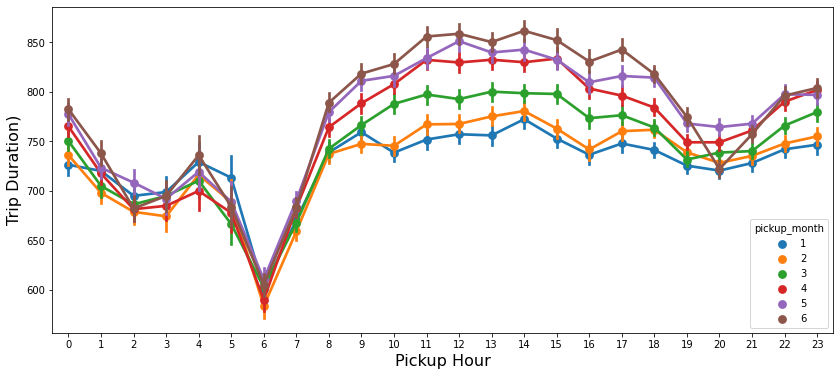

In [ ]:
#Plot showing variation in trip duraion for diffrent pickups for diffrent months 

plt.figure(figsize=(14,6))
sns.pointplot(x='pickup_datetime_hour',y='trip_duration',data=tripduration,hue='pickup_month')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration)',fontsize=16)

Text(0, 0.5, 'Trip Duration)')

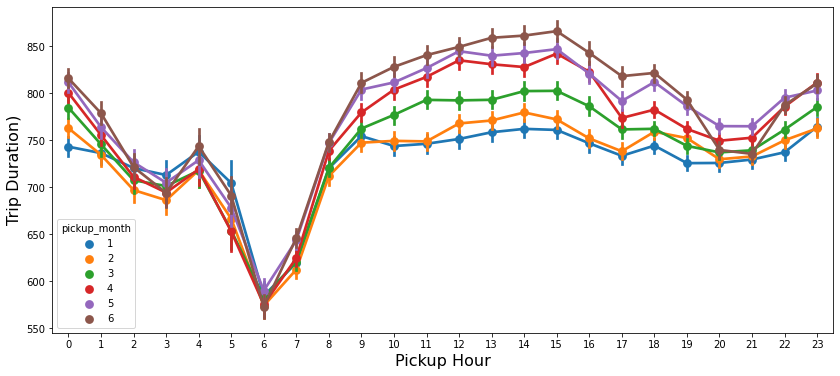

In [ ]:
#Plot showing variation in trip duraion for diffrent dropoffs for diffrent months 

plt.figure(figsize=(14,6))
sns.pointplot(x='dropoff_datetime_hour',y='trip_duration',data=tripduration,hue='pickup_month')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration)',fontsize=16)

Months only affect duration a little bit ; while pickup hours seems may be infulence that more

### Trip Duration vs Pickup/Dropoff hour for diffrent days of the week 




Text(0, 0.5, 'Trip Duration)')

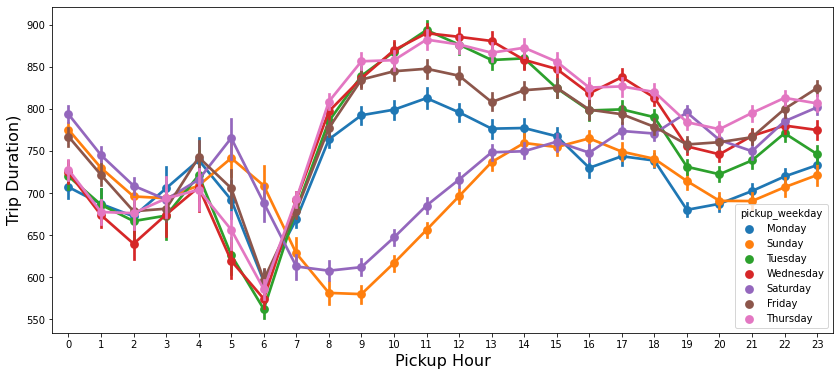

In [ ]:

# Plotting a line graph to represent the change in time duration of trip for diffrent days of the week 

plt.figure(figsize=(14,6))
sns.pointplot(x='pickup_datetime_hour',y='trip_duration',data=tripduration,hue='pickup_weekday')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration)',fontsize=16)


Text(0, 0.5, 'Trip Duration)')

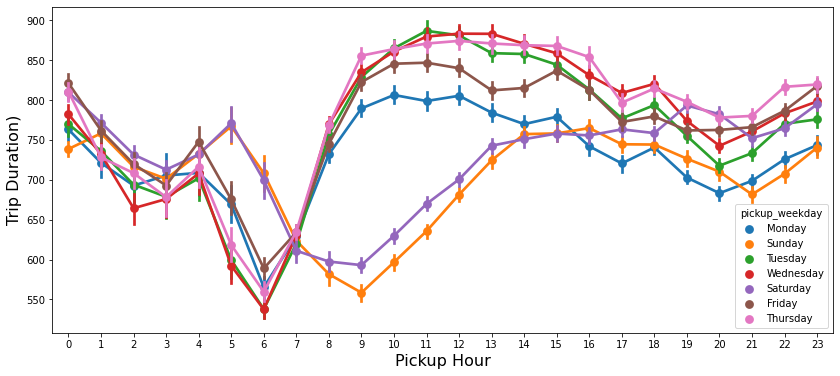

In [ ]:
# Plotting a line graph to represent the change in time duration of trip for diffrent days of the week 

plt.figure(figsize=(14,6))
sns.pointplot(x='dropoff_datetime_hour',y='trip_duration',data=tripduration,hue='pickup_weekday')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration)',fontsize=16)




*   During the moring rush hours from Monday to Friday ie. 7 AM to 10 AM, maybe owing to traffic jam.


* Duration are high duing wokday (Mon.-Fri.)






In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'dropoff_date', 'pickup_weekday',
       'dropoff_weekday', 'pickup_month', 'dropoff_month', 'Pick_Up_time',
       'Drop_off_time', 'pickup_Year', 'dropoff_Year', 'pickup_datetime_hour',
       'dropoff_datetime_hour', 'distance_miles', 'Avg_Speed'],
      dtype='object')

In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
dependent_variable = 'trip_duration'

In [ ]:
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

In [ ]:
independent_variables

['dropoff_month',
 'pickup_weekday',
 'pickup_Year',
 'pickup_datetime',
 'dropoff_latitude',
 'Pick_Up_time',
 'passenger_count',
 'dropoff_datetime',
 'store_and_fwd_flag',
 'dropoff_longitude',
 'pickup_date',
 'distance_miles',
 'dropoff_weekday',
 'vendor_id',
 'pickup_datetime_hour',
 'dropoff_Year',
 'pickup_longitude',
 'dropoff_datetime_hour',
 'Avg_Speed',
 'dropoff_date',
 'pickup_latitude',
 'Drop_off_time',
 'pickup_month']

In [ ]:
X = df[independent_variables].values

In [ ]:
y = df[dependent_variable].values

NameError: ignored